Name: Mohamad Jawad ABOU ALEIWI

In [32]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random

5


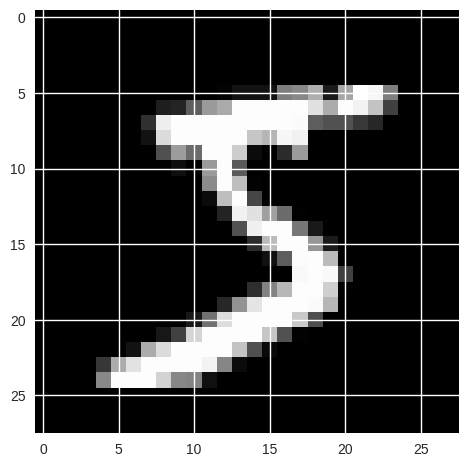

In [33]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")

x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]

x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]

print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

In [34]:
inputs = keras.Input(shape=(784,), name="digits")

x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)

outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([3, 3, 3, 3, 1, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3,
       3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [36]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

Model:

Question 4.1:

The total number of optimization parameters are : (784+1)x32 + (32+1)x32 + (32+1)x10 = 26506.

Since the input layer simply passes the input data forward, it doesn't perform any computation involving weights or biases.

Stochastic Gradient Descent:

Question 5.1:

The step size is given as: $$\gamma_k = \frac{\gamma_0}{\sqrt{k}}$$


In [37]:
def SGD(untrained_model, initial_step, epochs, batch_size=32):

    model = tf.keras.models.clone_model(untrained_model)
    error_list = [] # list to store errors during training

    # nb of iterations
    k = 0

    for epoch in range(epochs):
        for _ in range(x_train.shape[0] // batch_size):

            # update step size
            step = initial_step / np.sqrt(k)
            k += 1

            # take a random batch, by default we assume it is 32
            x_train_batch = x_train[random.randint(0, x_train.shape[0] - batch_size):random.randint(0, x_train.shape[0] - batch_size) + batch_size]
            y_train_batch = y_train[random.randint(0, x_train.shape[0] - batch_size):random.randint(0, x_train.shape[0] - batch_size) + batch_size]

            # compute gradients
            with tf.GradientTape() as tape:
                logits = model(x_train_batch)
                loss_value = loss(y_train_batch, logits)

            grad = tape.gradient(loss_value, model.trainable_weights)

            new_weights = model.trainable_weights.copy()

            # update weights
            for i in range(len(new_weights)):
                new_weights[i] = new_weights[i] - step * grad[i]
            model.set_weights(new_weights)

            # evaluate error every 10 iterations, save computing time
            if k % 10 == 0:
                samples_for_evaluation = np.random.randint(0, 10000, 1000)
                logits = model(x_train[samples_for_evaluation])
                error = loss(y_train[samples_for_evaluation], logits).numpy()
                error_list.append([k, np.linalg.norm(error)])

    print("Training completed for", epochs, "epoch(s).")
    return model, error_list

Question 5.2:

Training completed for 1 epochs.


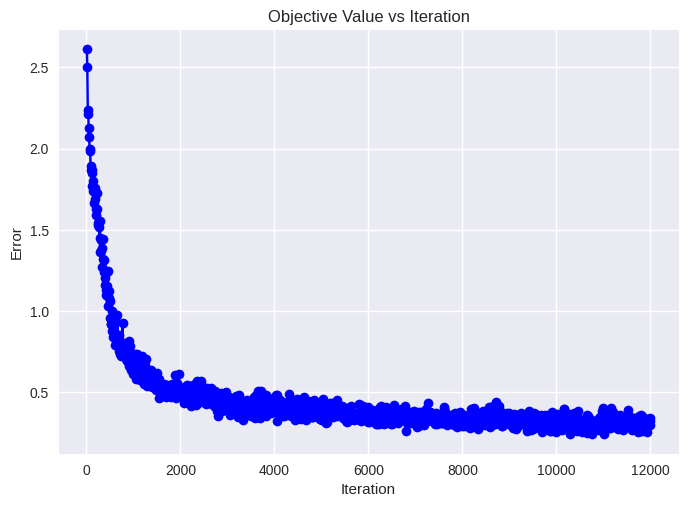

In [40]:
# run for one epoch
trained_model,err = SGD(model,1,1)

x_values = [error[0] for error in err]
y_values = [error[1] for error in err]

# plot the function and the points
plt.plot(x_values, y_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Objective Value vs Iteration')
plt.legend()
plt.show()

Empirical Risk Minimizer:

Question 6.1:

Training completed for 10 epochs.


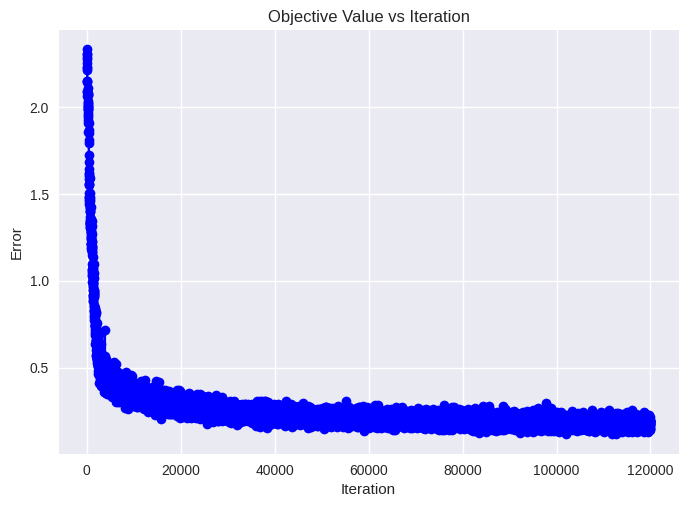

In [42]:
# run for ten epochs
trained_model_10,err_10 = SGD(model,1,10)

x_values_10 = [error[0] for error in err_10]
y_values_10 = [error[1] for error in err_10]

# plot the function and the points
plt.plot(x_values_10, y_values_10, marker='o', linestyle='-', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Objective Value vs Iteration')
plt.legend()
plt.show()

Question 6.2:

Computational Efficiency: Make it more computationally efficient compared to pure stochastic gradient descent, which updates the model's parameters after each individual data point.

Smooth Convergence: By averaging the gradients more stable updates to the model's parameters compared to pure stochastic gradient descent. This smoothing effect helps in achieving smoother convergence towards the optimal solution.

Regularization: By averaging gradients over multiple data points, provides a form of implicit regularization, which can help prevent overfitting and improve the generalization performance of the model.

Question 6.3:

Just updated the code in question 5. By deafult, I will take the batch size as 32.

Evaluation of the Model:

In [44]:
# training set
training_logits = trained_model(x_train)
training_error = loss(y_train, training_logits).numpy()

# testing set
testing_logits = trained_model(x_test)
testing_error = loss(y_test, testing_logits).numpy()

print("Training error:",training_error)
print("Testing error:",testing_error)

Training error: 2.3028593
Testing error: 2.3029547
